In [90]:
%pylab inline

def sense(x):
    return x

def control(y):
    k_p, k_d = 2, 3;
    theta_d, omega_d = pi/4, 0;
    
    e_theta = theta_d - y[0];
    e_omega =omega_d - y[1];
    
    omega_dot = (k_p * e_theta) + (k_d * e_omega);
    tau = Jyy * omega_dot
    u = tau / L
    #print ('theta: ', y[0])
    #print ('omega: ', y[1])
    return u

def simulate(dt, x, u):
    tau = L * u
    omega_dot = tau / Jyy
    dx = array([x[1], omega_dot]);
    x += dt * dx
    return [x, F]

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'omega')

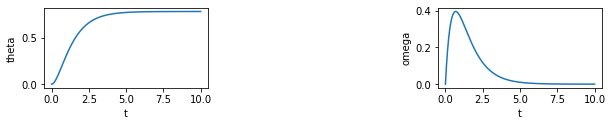

In [91]:
Jyy, L = 1, 1
tf = 10
dt = 0.01
time = linspace(0.,tf, int(tf / dt) + 1)  # Time interval



theta, omega = 0., 0.
x = array([theta, omega])
x_log = [copy(x)]

F = array([0, 0])
F_log = [copy(F)]

for t in time:
    y = sense(x)
    u = control(y)
    [x, F] = simulate(dt, x, u)
    x_log.append(copy(x))
    F_log.append(copy(F))
    
x_log = array(x_log)
fig = plt.figure(figsize=(10,5))
subplot(3,3,1)
plot(time[:],x_log[:-1, 0])
xlabel('t')
ylabel('theta')

subplot(3,3,3)
plot(time[:], x_log[:-1, 1])
xlabel('t')
ylabel('omega')